<a href="https://colab.research.google.com/github/sarodeshreyash/Retail-Sales-Prediction/blob/main/Individual_Retail_Sales_Prediction_Predicting_sales_of_a_major_store_chain_Rossmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction : Predicting sales of a major store chain Rossmann



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Shreyash sarode
##### **Team Member 2 -** Tushar Khairnar
##### **Team Member 3 -** Pradnya Pagar
##### **Team Member 4 -** Taha Nakedar

# **Project Summary -**

•	In the Rossmann sales prediction project there is a dataset which contains sales information.

•	The shape of Rossmann dataset = 1017209, 8 and Store dataset = 1115, 10.

•	In both dataset ‘Store’ column is common. So we do inner join on the basis of column ‘Store’. 

•	This dataset is a live dataset of Rossmann Stores. On analyzing this problem we observe that Rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem.

 In this Notebook we are going to work on following topics:-

 Analyzing the dataset by using Exploratory Data Analysis using exponential moving averages analysis trends and seasonality in Rossmann dataset Analyze Regression using following prediction analysis.
 
A) Linear Regression Analysis. 

B)Elastic Regression (Lasso & Ridge Regression).   

C) Decision tree.

D) Random Forest Regression.


# **GitHub Link -**

https://github.com/sarodeshreyash

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.**

**You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import pylab
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import math
from sklearn.ensemble import RandomForestRegressor
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn import ensemble


from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 1.5 MB/s 


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
rossmann_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone 2 ML Regression/Copy of Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone 2 ML Regression/Copy of store.csv')

### Dataset First View

In [ ]:
# Dataset First Look
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### So we have two datasets and both datasets have a common column "Store" so we can merge these two dataset and make single dataset containing all features.

In [ ]:
#mearging the two dataset using pd.merge funtion.
rossmannstore_df = pd.merge(rossmann_df, store_df, on='Store', how='left')
rossmannstore_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

rossmannstore_df.shape

(1017209, 18)

The rossmannstore_df has 1017209 number of rows and 18 columns.

### Dataset Information

In [ ]:
# Dataset Info

rossmannstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
rossmannstore_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
rossmannstore_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

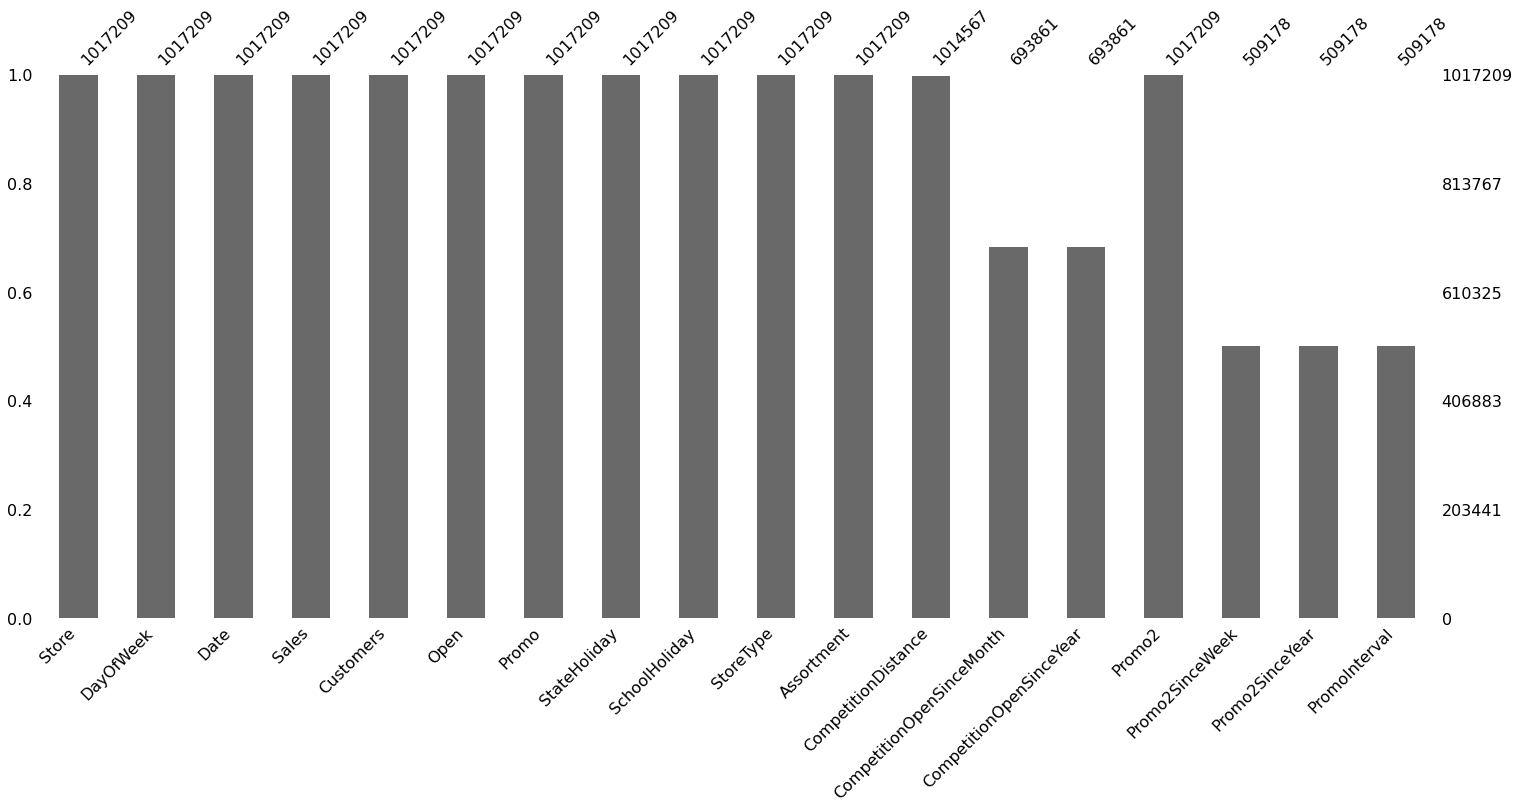

In [ ]:
# Visualizing the missing values
msno.bar(rossmannstore_df)

We have a Dataset of Rossmann Stores which contain 1017209 rows and 18 colums.
Some columns have missing values.

## ***2. Understanding Your Variables***

In [ ]:
# fetching list of Columns
Columns = list(rossmannstore_df.describe(include='all').columns)
Columns

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [ ]:
# Dataset Describe
rossmannstore_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description 


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
rossmannstore_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

rossmannstore_df['year'] = rossmannstore_df['Date'].apply(lambda x: x.split('-')[0])
rossmannstore_df['month'] = rossmannstore_df['Date'].apply(lambda x: x.split('-')[1])
rossmannstore_df['date'] = rossmannstore_df['Date'].apply(lambda x: x.split('-')[2])

# now we can drop existing Date column
rossmannstore_df= rossmannstore_df.drop(['Date'],axis = 1)

we have date column, we have to separate the date, month and year from that.
We have fetch the data from Date column so we can drop it.


## ***4. Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
rossmannstore_df.isnull().sum()


Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
date                              0
dtype: int64

 Hence we can see that there are so many columns having multiple null values.

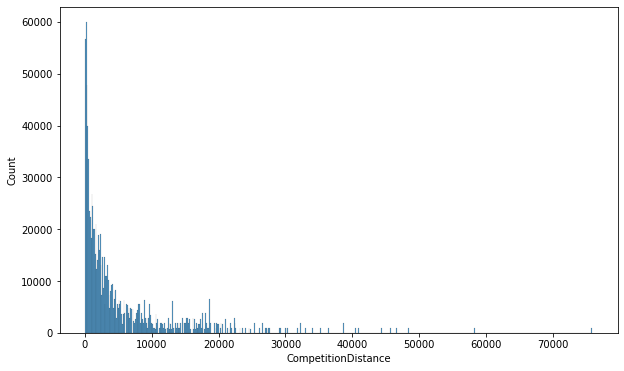

In [ ]:
#checking the disribution of CompetitionDistance column
plt.figure(figsize=(10,6))
sns.histplot(rossmannstore_df['CompetitionDistance'])
plt.show()

Here, we can understant there is positive correlation of competition distance.

In [ ]:
#replacing Nan values in CompetitionDistance with median.
rossmannstore_df['CompetitionDistance'].fillna(rossmannstore_df['CompetitionDistance'].median(), inplace = True)

In [ ]:
# Droping some columns
rossmannstore_df = rossmannstore_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [ ]:
#check
rossmannstore_df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
year                   0
month                  0
date                   0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?



we remove the columns having more number of null values and these columns are not much impactful

After checking distribution of CompetitionDistance column we find out that data is left skewed so we use median to replace null values

### 2. Handling Outliers


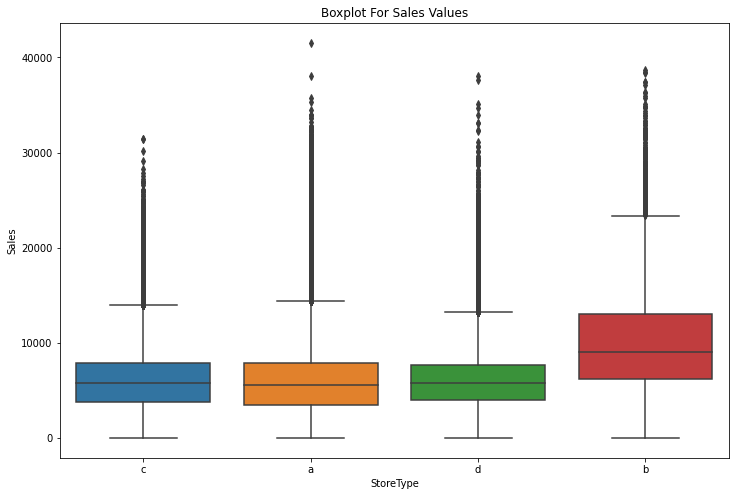

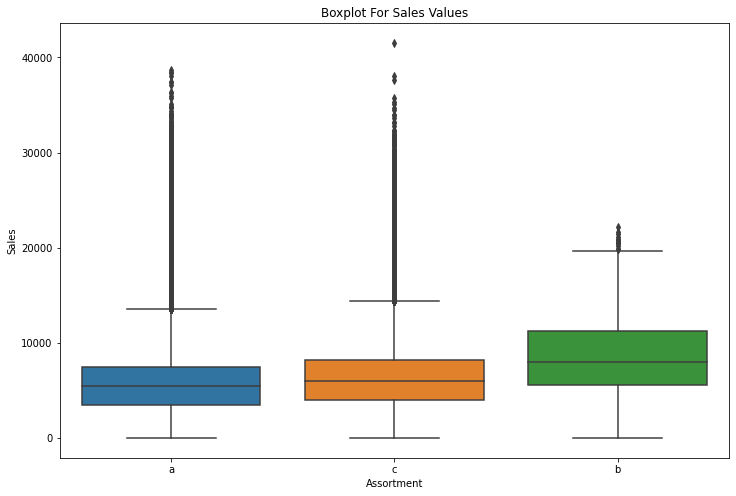

In [ ]:
# Handling Outliers & Outlier treatments
for col in ['StoreType','Assortment']:
  plt.figure(figsize=(12, 8))
  plot_storetype_sales = sns.boxplot(x=col, y="Sales", data=rossmannstore_df)
  plt.title('Boxplot For Sales Values')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?


In this above boxplot we see too many outliers. if we look at the data and apply some domain knowledge . we easily understand that these values are not outliers.

For Example :-

If a store start giving discount on some products which means number of sales increase due to some discount. so when we compline our data and plot and box plot on a yearly based data so some of our value shown as outliers.beacuse in some month or an specific occasions store giving some discount..

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

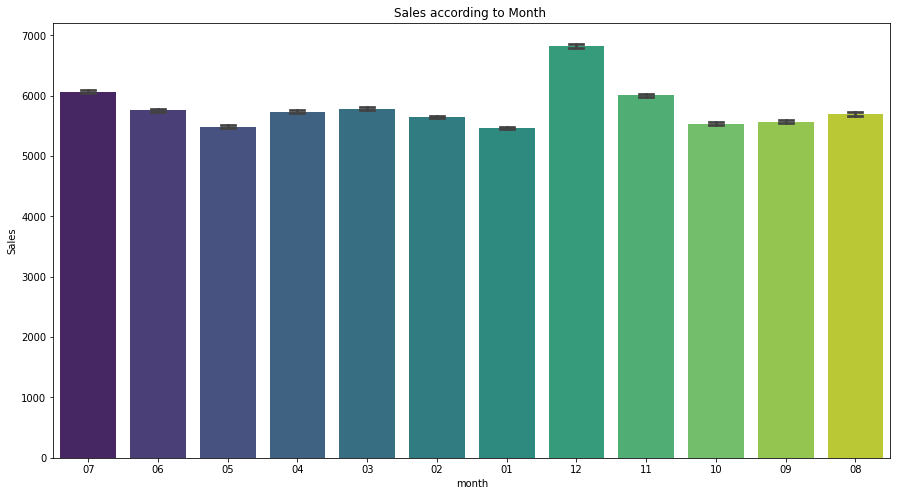

In [ ]:
# Distributing sales with respect to month

fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=rossmannstore_df,x='month',y='Sales',ax=ax,capsize=.2, palette= "viridis"  )
ax.set(title='Sales according to Month ')
plt.show()

As we see sales are increasing with months.

According to the plot we can see that the sell is increases in the December and Decrases in January

This plot concludes that sales are more in last 6 months as compare to first 6 months

By seeing this plot we can conclude that stores need more supply in between July to December
stores should offer some discount in january to June to attract more customers


#### Chart - 2

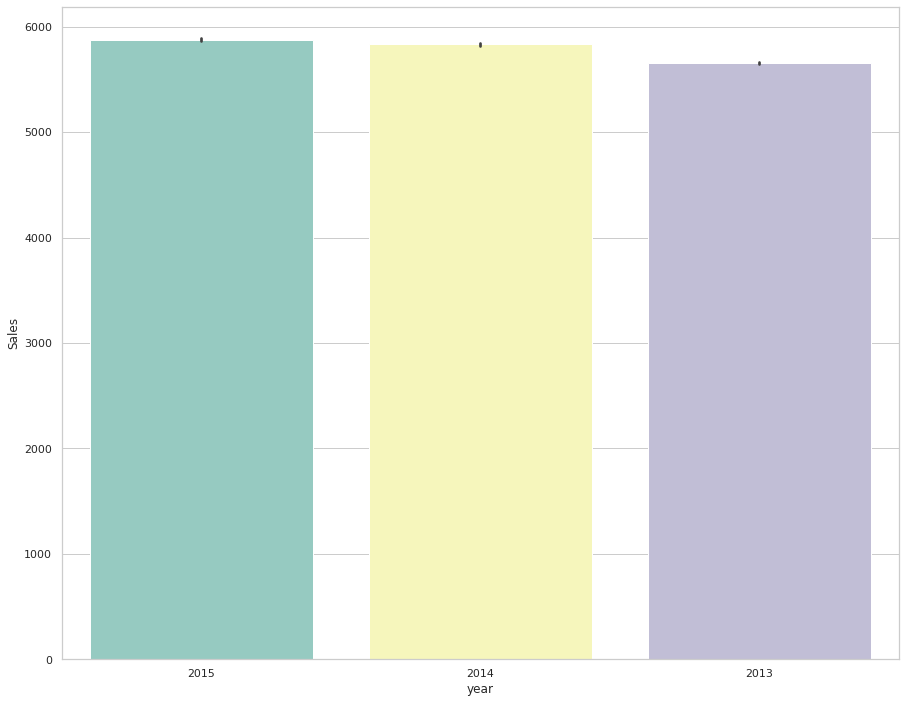

In [ ]:
#barplot of year and sales
sns.set_theme(style='whitegrid', rc={'figure.figsize':(15,12)})
ax=sns.barplot( x='year',y='Sales',data=rossmannstore_df, palette='Set3' )

##### 1. Why did you pick the specific chart?

We are plotting Bar graph to see the Sales according to year.

##### 2. What is/are the insight(s) found from the chart?

In this chart of sales according to years shows that in 2014 and 2015 have almost same sales through out the year but in 2013 there is slightly low sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sales was increased in year 2014 as compare to year 2013 But they were not increased in 2015 

In this the positive point is sell is not decrease 

#### Chart - 3

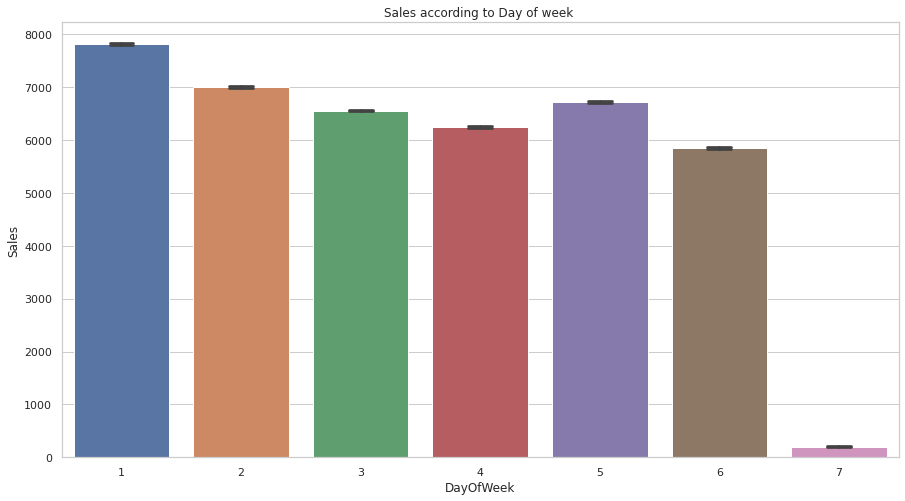

In [ ]:
# Chart - 3 visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=rossmannstore_df,x='DayOfWeek',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Day of week ')
plt.show()

##### 1. Why did you pick the specific chart?

We are plotting Bar graph to see the Sales according to Days in week.

##### 2. What is/are the insight(s) found from the chart?

We can conclude that sells are high on Monday and low on Sunday.

It may be because of holiday and on holiday people prefer to do other things than shopping.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Stores have to try increasing sell on sunday or they can close the store for half day on sunday to minimize expenditure.

#### Chart - 4

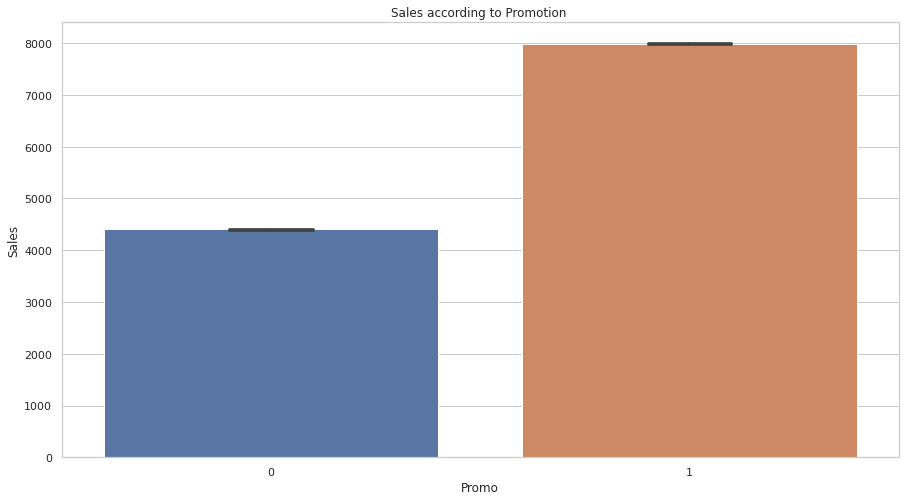

In [ ]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=rossmannstore_df,x='Promo',y='Sales',ax=ax,capsize=.2,)
ax.set(title='Sales according to Promotion ')
plt.show()

##### 1. Why did you pick the specific chart?

To know how promotion affects the sells.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the store who participating in promotion having more sales as compare to other. which means promotion is the key to attract the customer towards the store

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can increse sells by promotion 

#### Chart - 5

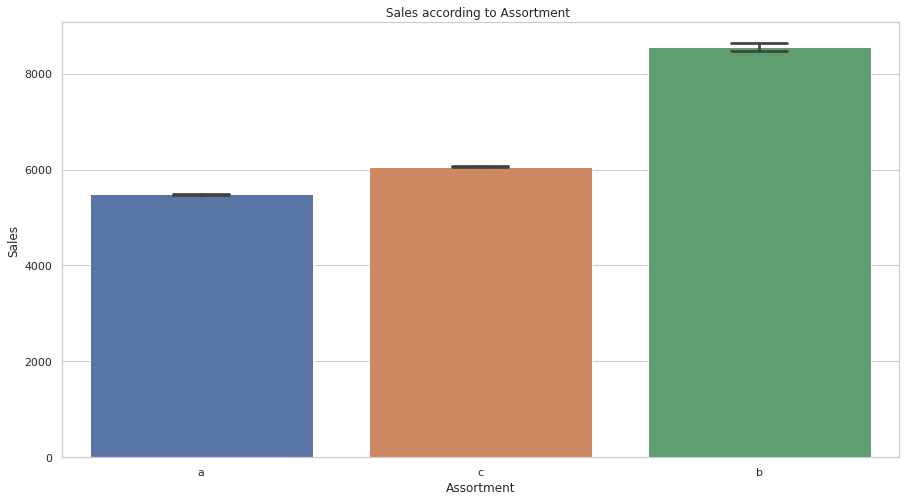

In [ ]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=rossmannstore_df,x='Assortment',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Assortment ')
plt.show()

##### 1. Why did you pick the specific chart?

To know how Assortment level make effet on Sales. 

##### 2. What is/are the insight(s) found from the chart?

In the above chart The sales in which product assortment type "b" have higher sales as compare to other assortment catagory. the rest of assortment having almost same sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot shows People prefer Extra level of Assortment

#### Chart - 6

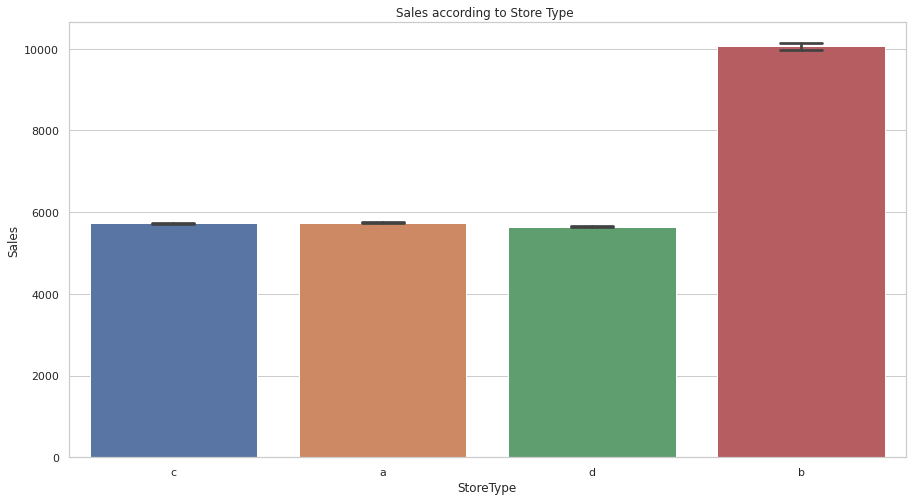

In [ ]:
# Chart - 6 visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=rossmannstore_df,x='StoreType',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Store Type ')
plt.show()

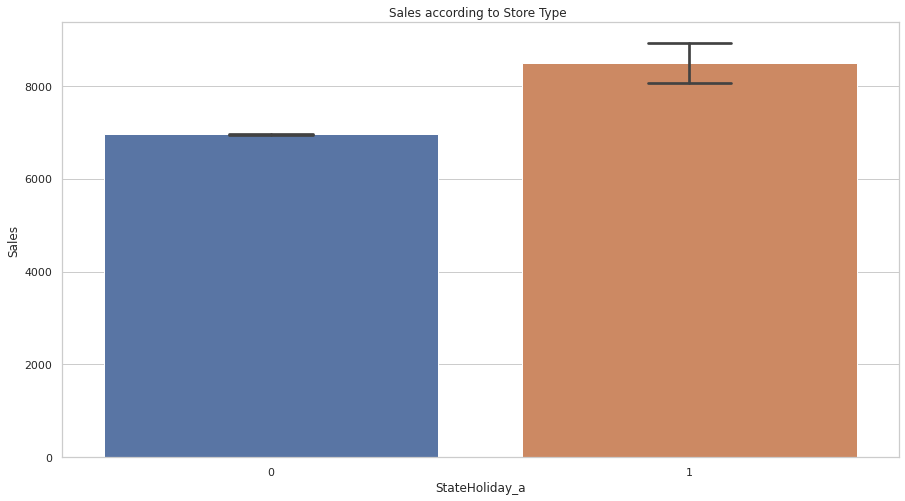

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=rossmannstore_df,x='StateHoliday_a',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Store Type ')
plt.show()

##### 1. Why did you pick the specific chart?

This plot shows relation between StoreType and Sales 

##### 2. What is/are the insight(s) found from the chart?

In the above chart The sales in the store type "b" have higher sales as compare to other store catagory. the rest of store having almost same sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If you want more sales then go with "b" StoryType

#### Chart - 7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f488619c0a0>,
      dtype=object)

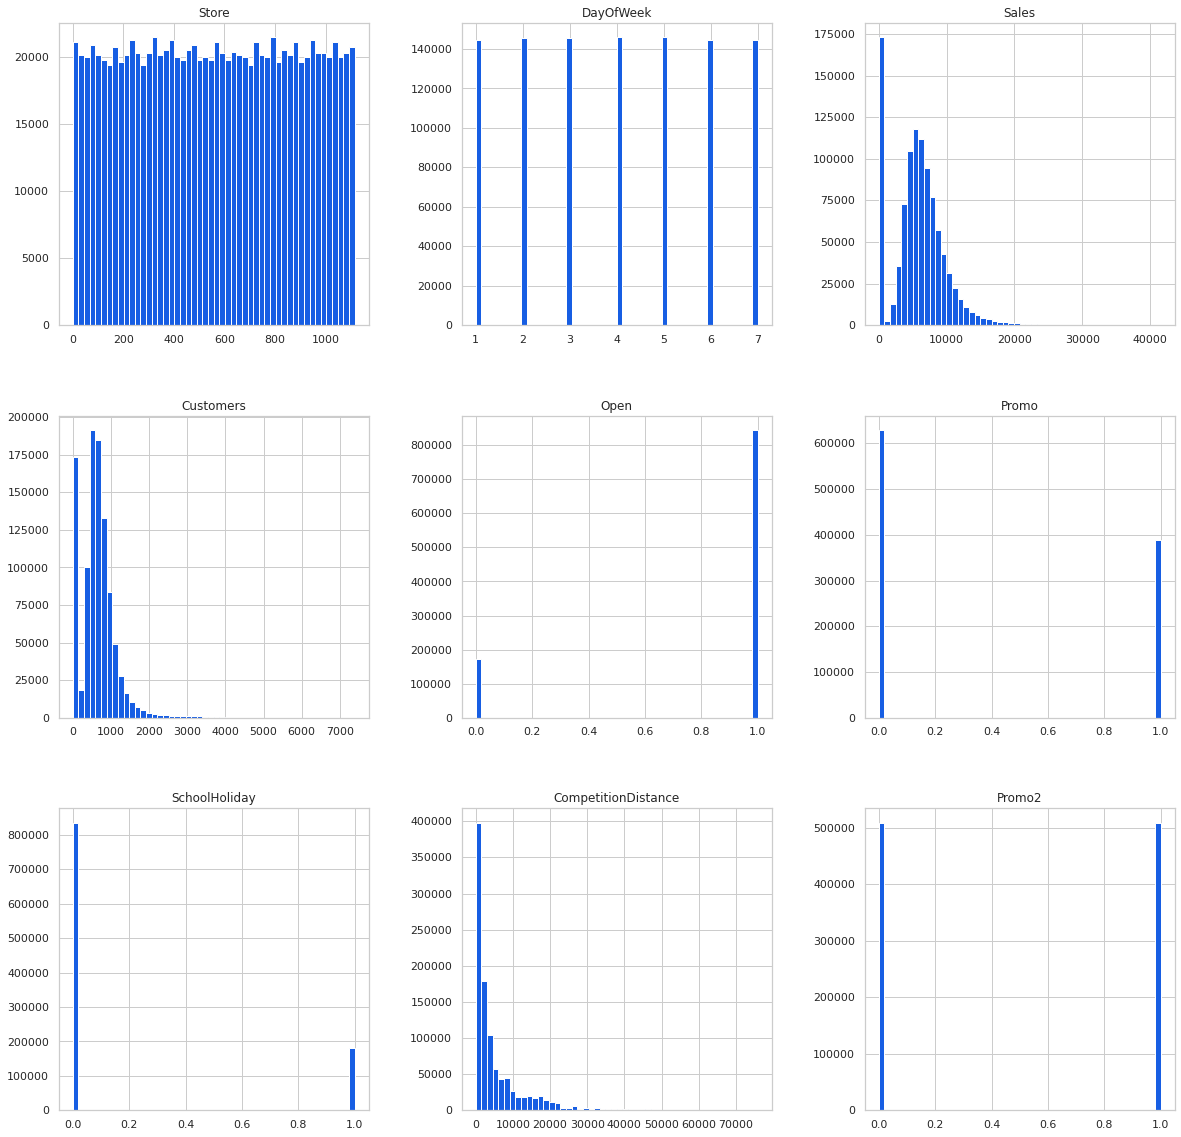

In [ ]:
# Chart - 7 visualization code

rossmannstore_df.hist(figsize = (20,20),bins=50,color='#175ee3')

#### Chart - 8

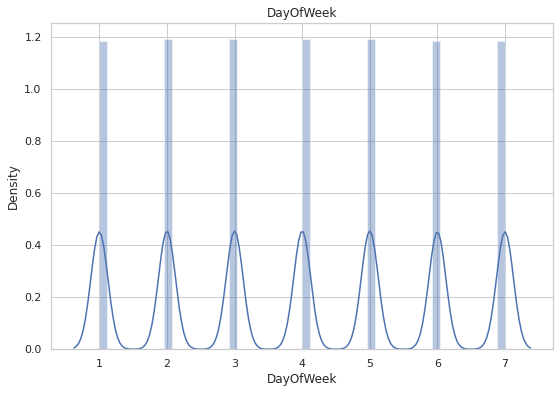

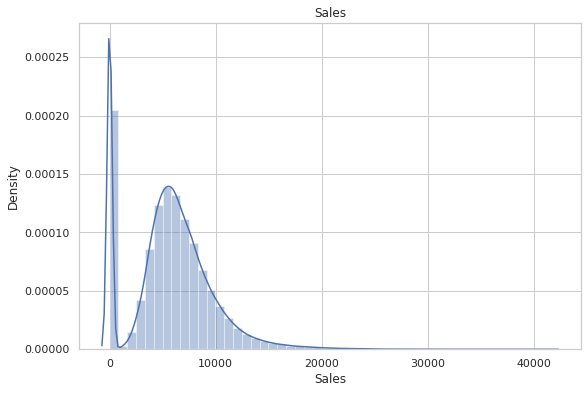

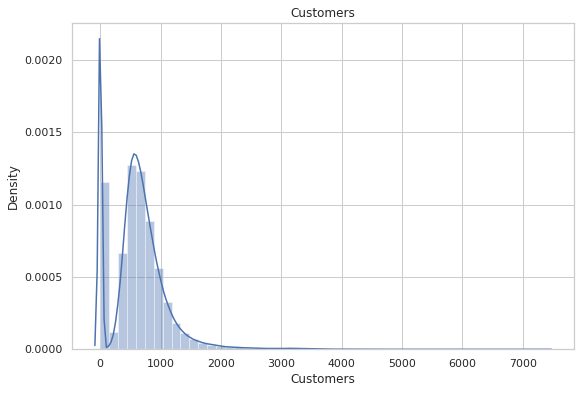

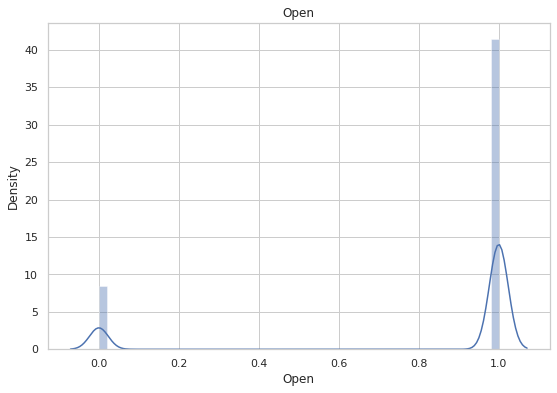

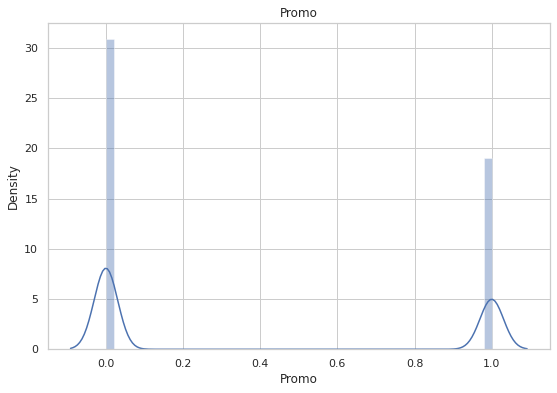

In [ ]:
# Chart - 8 visualization code
numeric_features = list(rossmannstore_df.describe().columns)

# printing displots to analyze the distribution of all numerical features
# plot a bar plot for each numerical feature count (except store)

for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = rossmannstore_df[col]
    sns.distplot(feature,ax = ax)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

printing displots to analyze the distribution of all numerical features

##### 2. What is/are the insight(s) found from the chart?

Data is not in normal distribution

#### Chart - 9

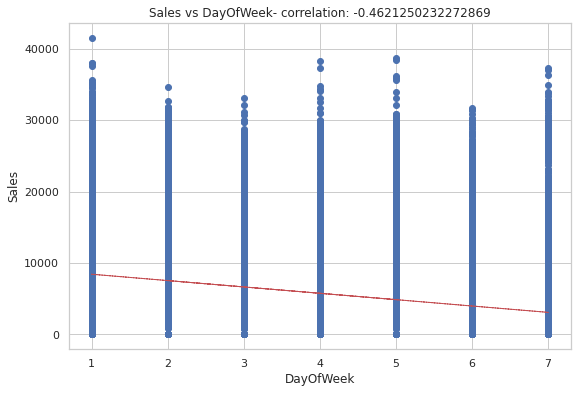

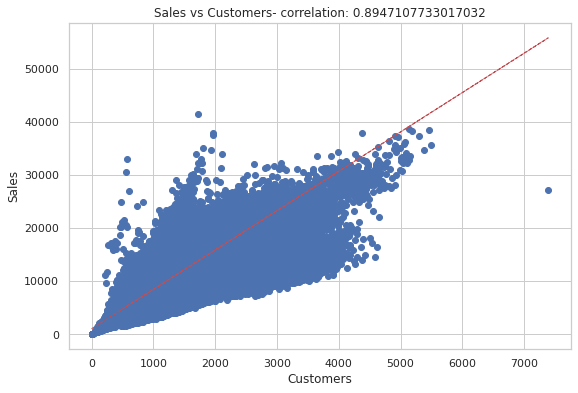

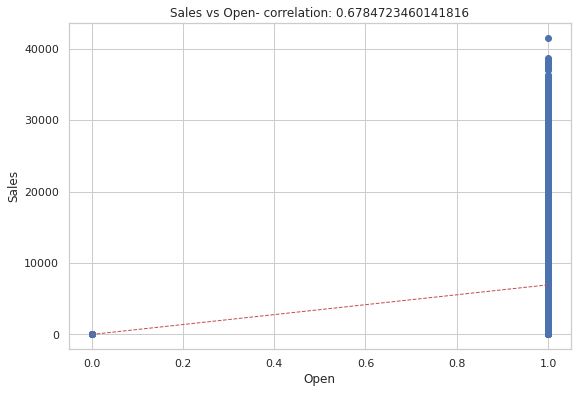

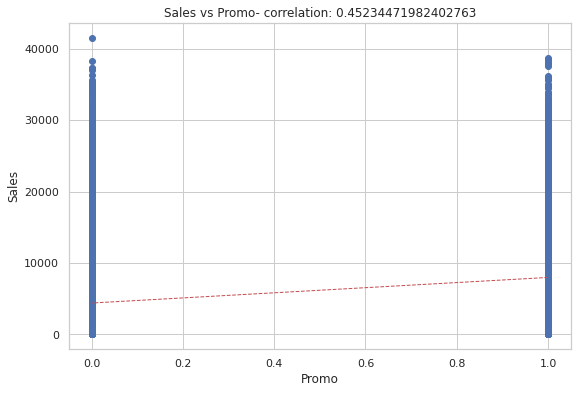

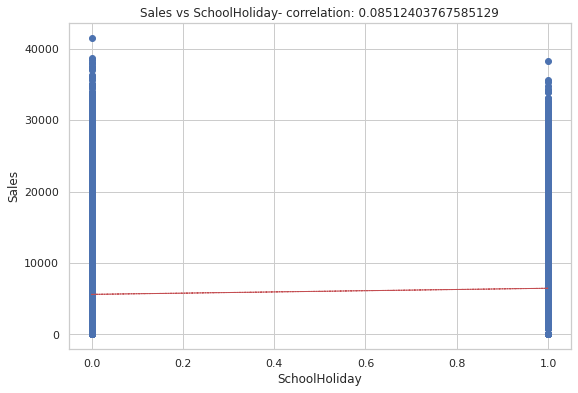

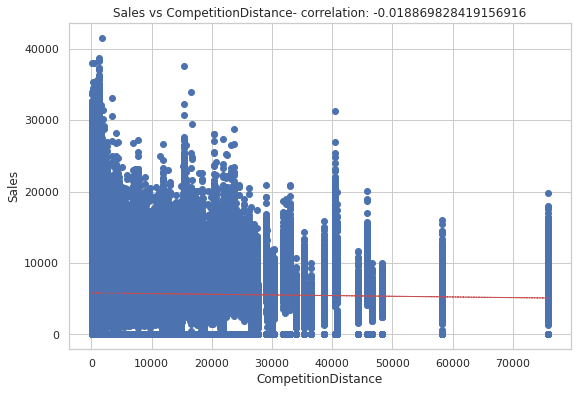

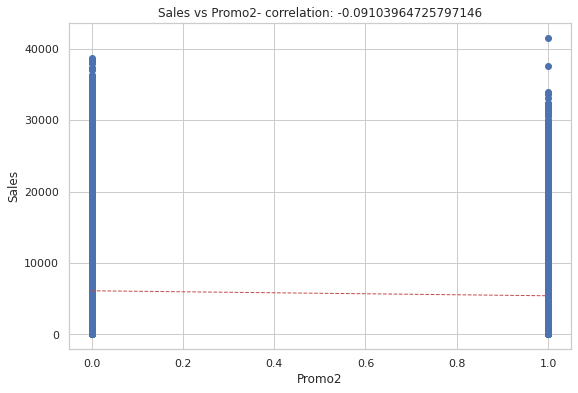

In [ ]:
# Chart - 13 visualization code
for col in numeric_features:
  if col not in ['Store','Date','Sales']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = rossmannstore_df[col]
    label = rossmannstore_df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(rossmannstore_df[col], rossmannstore_df['Sales'], 1 )
    y_hat = np.poly1d(z)(rossmannstore_df[col])

    plt.plot(rossmannstore_df[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

To find out the relation between Sales and other variables.

##### 2. What is/are the insight(s) found from the chart?

The 'Customers' variable is have strong relation with Sales

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The more number of customers means more Sales, Quite Obvious.

#### Chart - 10 - Correlation Heatmap

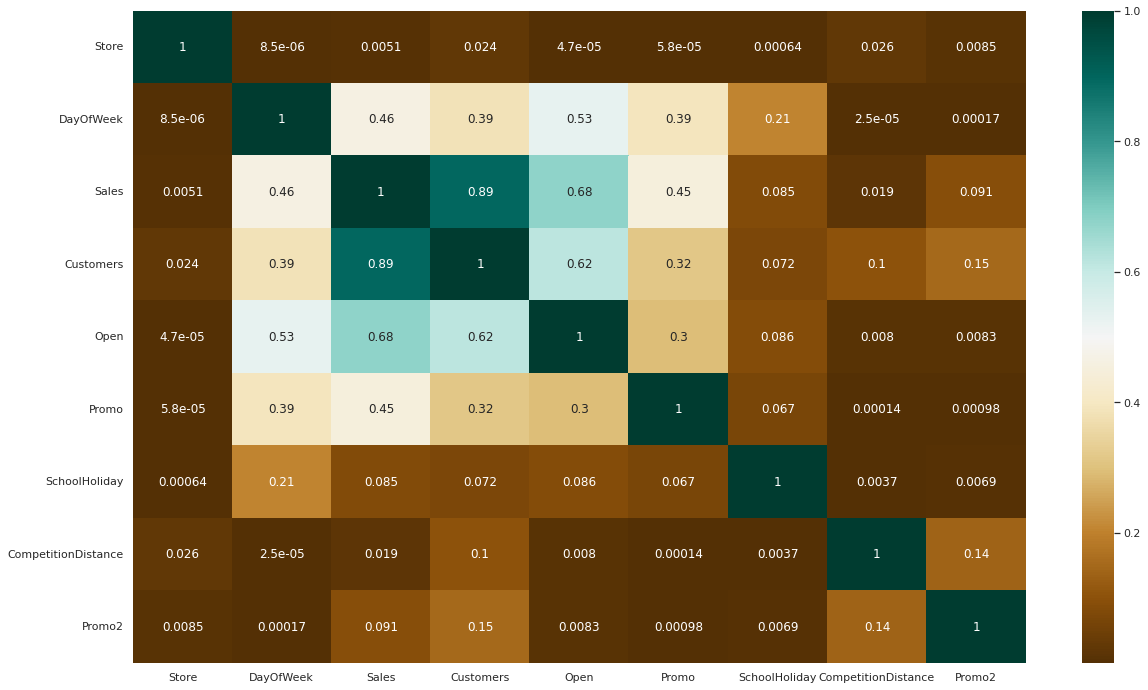

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,12))
correlation = rossmannstore_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='BrBG')
plt.show()

##### 1. Why did you pick the specific chart?

To find out co-relation between variables

##### 2. What is/are the insight(s) found from the chart?

This plot shows that customer is highly co-related with sales

#### Chart - 11 - Pair Plot 

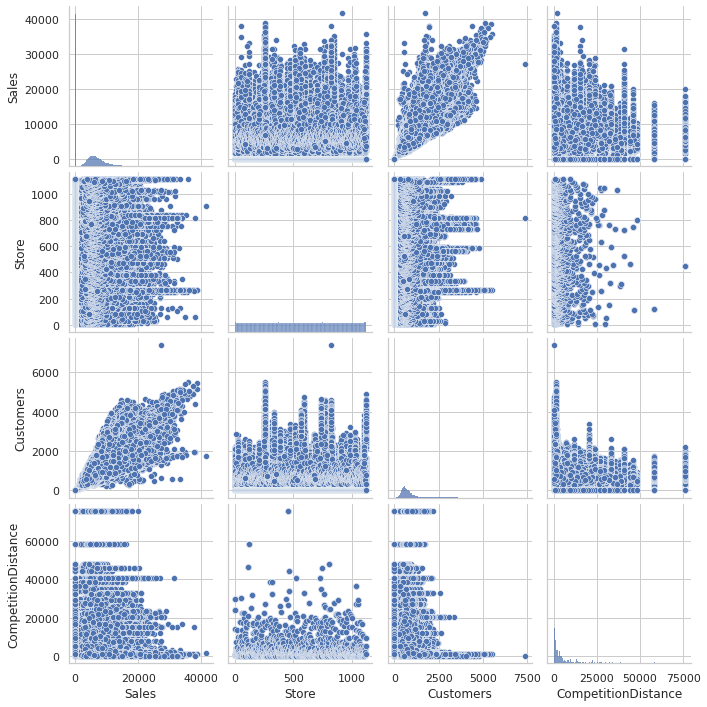

In [ ]:
# Pair Plot visualization code
#sns.pairplot(rossmannstore_df,hue ='day')
#plt.show()

Plot=rossmannstore_df[['Sales','Store', 'Customers','CompetitionDistance']]
sns.pairplot(Plot)
plt.show()

#### Chart - 12 

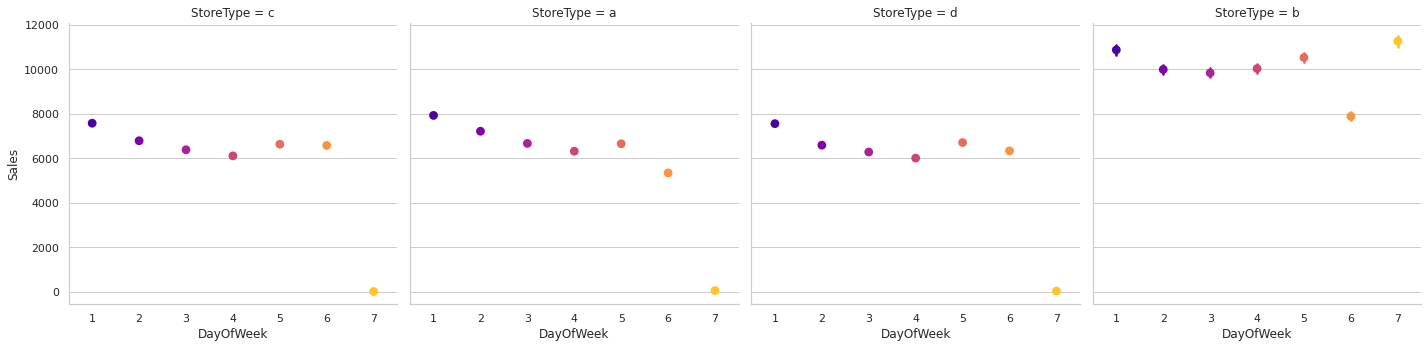

In [ ]:
sns.factorplot(data = rossmannstore_df, x = 'DayOfWeek', y = "Sales", 
               col = 'StoreType',
               palette = 'plasma')

We plot the sales on day of week according to store type.

## ***6. Feature Engineering***

### 1. Categorical Encoding

In [ ]:
# Encode your categorical columns
# stateholiday column

rossmannstore_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:

rossmannstore_df.loc[rossmannstore_df['StateHoliday'] == '0', 'StateHoliday'] = 0
rossmannstore_df = pd.get_dummies(rossmannstore_df, columns=["StateHoliday"],drop_first=True)

In [ ]:
# for Assortment column
rossmannstore_df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [ ]:
# code for changing Assortment dtype from object to int.
rossmannstore_df['Assortment'] = np.where((rossmannstore_df['Assortment'] == 'a'),0,rossmannstore_df['Assortment'])
rossmannstore_df['Assortment'] = np.where((rossmannstore_df['Assortment'] == 'b'),1,rossmannstore_df['Assortment'])
rossmannstore_df['Assortment'] = np.where((rossmannstore_df['Assortment'] == 'c'),2,rossmannstore_df['Assortment'])

In [ ]:
#for StoreType column
rossmannstore_df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [ ]:
#converting catagorical value into interger values based on store type class.
rossmannstore_df['StoreType'] = np.where((rossmannstore_df['StoreType'] == 'a'),0,rossmannstore_df['StoreType'])
rossmannstore_df['StoreType'] = np.where((rossmannstore_df['StoreType'] == 'b'),1,rossmannstore_df['StoreType'])
rossmannstore_df['StoreType'] = np.where((rossmannstore_df['StoreType'] == 'c'),2,rossmannstore_df['StoreType'])
rossmannstore_df['StoreType'] = np.where((rossmannstore_df['StoreType'] == 'd'),3,rossmannstore_df['StoreType'])

In [ ]:
#converting object dtype to integer.
rossmannstore_df['year']= rossmannstore_df['year'].astype(int)
rossmannstore_df['month']= rossmannstore_df['month'].astype(int)
rossmannstore_df['date']= rossmannstore_df['date'].astype(int)
rossmannstore_df['StoreType']= rossmannstore_df['StoreType'].astype(int)
rossmannstore_df['Assortment']= rossmannstore_df['Assortment'].astype(int)

#### What all categorical encoding techniques have you used & why did you use those techniques?

>To deal with categorical values we have use One Hot Encoding technique to convert them into numerical

>In StoreType column we have replace categorical values with numerical

>We had features having object data type so convert them as integer data type

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

We have feature name called 'Open' which simply tells us weather a store open or close. Sales only generated when store is open. So we have to eleminate those rows/ observation in which store is closs or its value = 0. Then we have only data of store which is open. so we also drop that columns because all the observation values are same as '1'.

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
rossmannstore_df[(rossmannstore_df['Open'] == 0) & (rossmannstore_df['Sales'] == 0)].count()[0]
rossmannstore_df = rossmannstore_df.drop((rossmannstore_df[(rossmannstore_df['Open'] == 0) & (rossmannstore_df['Sales'] == 0)].index))

In [ ]:
#Multicollinearity

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(rossmannstore_df[[i for i in rossmannstore_df.describe().columns if i not in ['Store','Sales','Open',]]])

,variables,VIF
0,DayOfWeek,5.768711
1,Customers,5.395054
2,Promo,2.064591
3,SchoolHoliday,1.285619
4,StoreType,1.970762
5,Assortment,2.047143
6,CompetitionDistance,1.613348
7,Promo2,2.160862
8,year,23.792604
9,month,4.166033


The Multicollinearity of 'year' is very high so we decided to drop these column for our linear Regression model.
Because the the multicollinearity of each independeble feature should be under 10.

In [ ]:
#Checking multicollinearity 

calc_vif(rossmannstore_df[[i for i in rossmannstore_df.describe().columns if i not in ['Store','Sales','Open','year']]])

,variables,VIF
0,DayOfWeek,4.045908
1,Customers,4.107350
2,Promo,1.893498
3,SchoolHoliday,1.271504
4,StoreType,1.886219
5,Assortment,2.029048
6,CompetitionDistance,1.531446
7,Promo2,1.936858
8,month,3.682037
9,date,3.630245


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = rossmannstore_df.columns.drop(['Store','Sales','Open',])

In [ ]:
indep_var

Index(['DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday', 'StoreType',
       'Assortment', 'CompetitionDistance', 'Promo2', 'year', 'month', 'date',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [ ]:
# Create the data of independent variables
X = rossmannstore_df[indep_var].values

# Create the dependent variable data
y = rossmannstore_df[dep_var].values

##### What all feature selection methods have you used  and why?

We have 'Sales' as a Target variable.
In Independant variable we exclude 'Store', 'open' variables 

##### Which all features you found important and why?

We found following features importatnt as they play vital role to predict the sale :-
'DayOfWeek',
 'Customers',
  'Promo', 'SchoolHoliday', 'StoreType',
       'Assortment', 'CompetitionDistance', 'Promo2', 'year', 'month', 'date',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'.

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
rossmannstore_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,5263,555,1,1,1,2,0,1270.0,0,2015,7,31,0,0,0
1,2,5,6064,625,1,1,1,0,0,570.0,1,2015,7,31,0,0,0
2,3,5,8314,821,1,1,1,0,0,14130.0,1,2015,7,31,0,0,0
3,4,5,13995,1498,1,1,1,2,2,620.0,0,2015,7,31,0,0,0
4,5,5,4822,559,1,1,1,0,0,29910.0,0,2015,7,31,0,0,0


In [ ]:
numeric_features

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'Promo2']

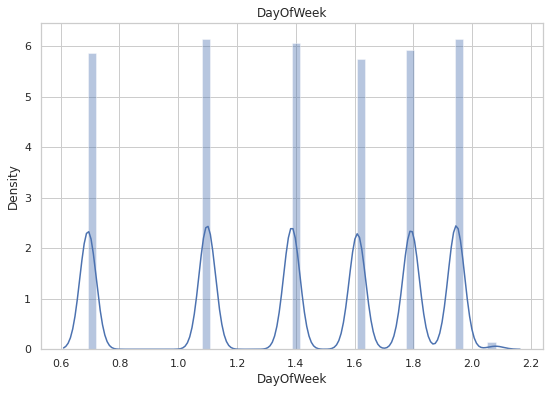

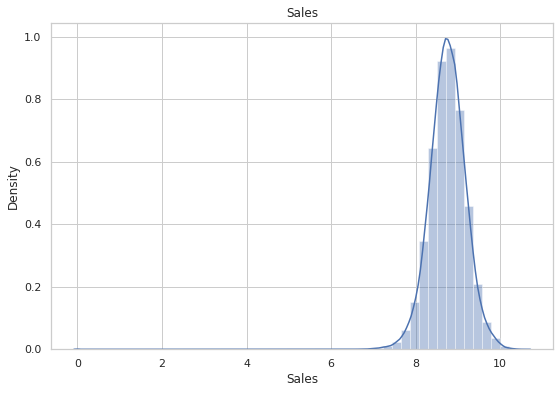

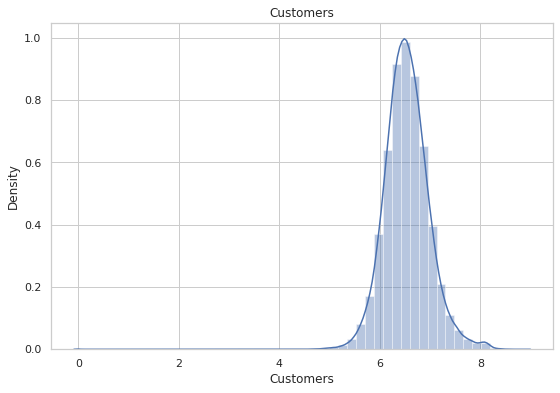

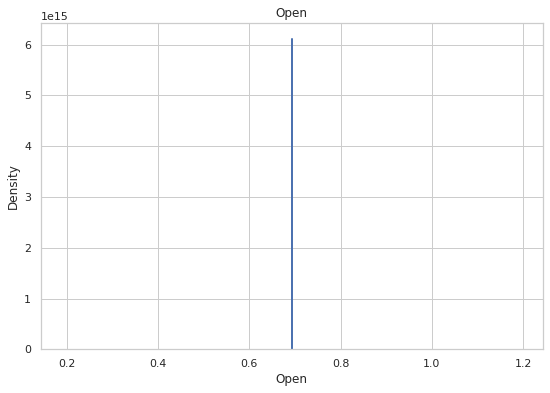

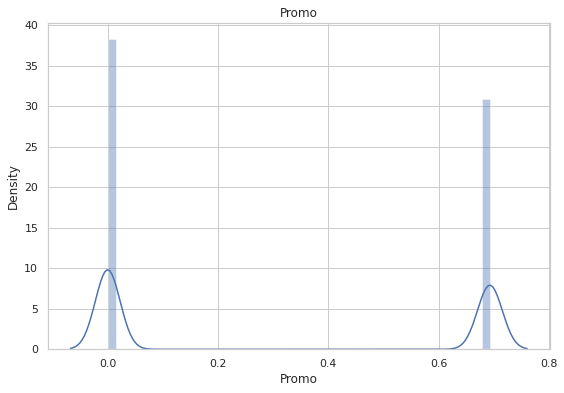

In [ ]:
# Transform Your data
#printing displots to analyze the distribution of all numerical features
# plot a bar plot for each numerical feature count (except store) with  log1p tranformation.

for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log1p(rossmannstore_df[col])
    sns.distplot(feature)    
    ax.set_title(col)    
    
plt.show()

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(675513, 14)
(168879, 14)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Spliting of data means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

So we have spilting the data into 80:20 proportion 


## ***7. ML Model Implementation***

### ML Model - 1. Linear Regression

In [ ]:
from sklearn import metrics
#Evaluate Metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [ ]:
# fit the model 
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [ ]:
# predict the model
pred = lin_reg.predict(X_test)

In [ ]:
#Evaluation Metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 1046.6538511922556
MSE: 2290313.749739071
RMSE: 1513.3782573233536
R2 Square 0.7620393908925154
__________________________________
Test set evaluation:
_____________________________________
MAE: 1048.2070704407117
MSE: 2303878.8040796276
RMSE: 1517.8533539441903
R2 Square 0.7620360949873861
__________________________________


We have apply linear regression model and got the value of r2 is 0.76.

We can conclude that our linear model is not able to perform well on this data.

### ML Model - 2. Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# fit the model

lasso = Lasso(selection='random',random_state=0)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

test_pred = lasso_regressor.predict(X_test)
train_pred = lasso_regressor.predict(X_train)

# test the model performance


print('Train set evaluation:\n_____________________________________')
zw=print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

Train set evaluation:
_____________________________________
MAE: 1046.6538511925035
MSE: 2290313.7497390704
RMSE: 1513.3782573233534
R2 Square 0.7620393908925154
__________________________________
Test set evaluation:
_____________________________________
MAE: 1048.2070704409323
MSE: 2303878.804079227
RMSE: 1517.8533539440584
R2 Square 0.7620360949874274
__________________________________
The best fit alpha value is found out to be : {'alpha': 1e-08}


### ML Model - 3. Ridge Regression

In [ ]:
# Import packages
from sklearn.linear_model import Ridge

# implement model
ridge = Ridge(alpha=0.001, solver='cholesky', tol=0.0001, random_state=42)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

#fit the model
test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

# test on train data set
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# test on test dataset
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 1046.6538516189808
MSE: 2290313.7497390704
RMSE: 1513.3782573233534
R2 Square 0.7620393908925154
__________________________________
Test set evaluation:
_____________________________________
MAE: 1048.207070868566
MSE: 2303878.8040456316
RMSE: 1517.8533539329917
R2 Square 0.7620360949908975
__________________________________


We have applied the Lasso(l1) & Ridge(l2) regression but still we dont get much improvement in the results.

### ML Model - 4. Elastic net Regression

In [ ]:
# import Packages
from sklearn.linear_model import ElasticNet

# model Impletation
Elastic = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
Elastic.fit(X_train, y_train)

# fit the model
test_pred = Elastic.predict(X_test)
train_pred = Elastic.predict(X_train)

# test model on train data set
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

# test model on test data set
print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)

Train set evaluation:

MAE: 1049.6912246026532
MSE: 2291132.626002444
RMSE: 1513.6487789452492
R2 Square 0.76195431071761
__________________________________
Test set evaluation:

MAE: 1051.2560738862626
MSE: 2304473.7170603364
RMSE: 1518.049313118759
R2 Square 0.7619746473904979
__________________________________


We have applied Elastic Net and got some changes but still they are not that much remarkable.

### ML Model - 5. Decision Tree

In [ ]:
#import packages
from sklearn.tree import DecisionTreeRegressor

#implement model
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)

#fit the model
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

# test model on train data set
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)



Train set evaluation:
_____________________________________
MAE: 0.09025584999844563
MSE: 61.0788918940124
RMSE: 7.815298579965605
R2 Square 0.999993653982857
__________________________________
Test set evaluation:
_____________________________________
MAE: 511.5433535253051
MSE: 640931.0011605943
RMSE: 800.5816642670467
R2 Square 0.9337992764160402
__________________________________


We have applies Decision Tree and got the good results.
We got the value of  r2 for train data set is 0.99.
And for test data set we got 0.93.
We can conclude that Decision Tree perform well on this data set as compare to linear model.

### ML Model - 6. Random Forest

In [ ]:
# import packages
from sklearn.ensemble import RandomForestRegressor

# model implementation
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [25]}
rfr = RandomForestRegressor(random_state = 1)

random_forest_model= GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)



In [ ]:
# # Fit the object to train dataset
random_forest_model.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [25]},
             return_train_score=True)

In [ ]:
train_pred = random_forest_model.predict(X_train)
test_pred = random_forest_model.predict(X_test)

In [ ]:
# test model on train data set

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Train set evaluation:
_____________________________________
MAE: 145.14864781327037
MSE: 51492.111410788195
RMSE: 226.91873305390234
R2 Square 0.9946500368358101
__________________________________


In [ ]:
# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Test set evaluation:
_____________________________________
MAE: 373.67988890862694
MSE: 324241.01997499645
RMSE: 569.4216539393251
R2 Square 0.9665096709332561
__________________________________


**By using Random Forest we got the r2 value on train data set is 0.99 and for test data set 0.96.
Random forest got less r2 value than Decision tree but it gets the less error value.
So random forest perform well compare to other models**

### ML Model - 7. Gradient Boosting Regression

In [ ]:
# Model Training
from sklearn.ensemble import GradientBoostingRegressor

gbc_reg = GradientBoostingRegressor(random_state =42)
gbc_reg.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Model Prediction
y_pred_gb =gbc_reg.predict(X_test)
r2_score(y_pred_gb,y_test)

0.8523918640748918

In [ ]:
train_pred = gbc_reg.predict(X_train)
test_pred = gbc_reg.predict(X_test)

In [ ]:
# test model on train data set

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Train set evaluation:
_____________________________________
MAE: 785.2274323658838
MSE: 1153357.340318479
RMSE: 1073.9447566418298
R2 Square 0.880167677789979
__________________________________


In [ ]:
# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Test set evaluation:
_____________________________________
MAE: 784.9111468077135
MSE: 1160237.3029654971
RMSE: 1077.1431209293858
R2 Square 0.8801609707654438
__________________________________


### ML Model - 8. XGBoost regresstion

In [ ]:
import xgboost as xgb

In [ ]:
# Model Training

from xgboost import XGBRegressor

xgb_reg=XGBRegressor(max_depth=5,n_estimators=100,learning_rate=0.3,n_jobs=-1)   
xgb_reg.fit(X_train,y_train)

[16:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.3, max_depth=5, n_jobs=-1)

In [ ]:
# Model Prediction
y_pred_xgb =xgb_reg.predict(X_test)
r2_score(y_pred_xgb,y_test)


0.9390886879490301

In [ ]:
test_pred = xgb_reg.predict(X_test)
train_pred = xgb_reg.predict(X_train)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
_____________________________________
MAE: 533.4884669439748
MSE: 529384.3037459454
RMSE: 727.5880041245495
R2 Square 0.9449976618331534
__________________________________
Test set evaluation:
_____________________________________
MAE: 535.390022651161
MSE: 540738.3682442417
RMSE: 735.3491471704049
R2 Square 0.9441480109675503
__________________________________


In [ ]:
LR=round(lin_reg.score(X_train,y_train)*100,2)

Rg=round(ridge.score(X_train,y_train)*100,2)
Elas=round(Elastic.score(X_train,y_train)*100,2)
Dt=round(DT_model.score(X_train,y_train)*100,2)
Rf=round(random_forest_model.score(X_train,y_train)*100,2)
gb=round(gbc_reg.score(X_train, y_train)*100,2)
xgbr=round(xgb_reg.score(X_train,y_train)*100,2)

from sklearn import metrics
ls2=round(metrics.r2_score(y_train,lasso_regressor.predict(X_train))*100,2)
ls2

76.2

In [ ]:
models =pd.DataFrame({
    'Model': ['Linear_Regression', 'Lasso_Regression','Ridge_Regression',
              'Elastic_Net', 'Desicion-Tree_Regression', 'Random_Forest', 'Gradient_Boosting_Regression','XGBoost_Regression'],
    'Score': [LR,ls2,Rg,Elas,Dt,Rf,gb,xgbr]})
#models.sort_values(by='Score')
#models
models.sort_values(by='Score',ascending=False)
#df=pd.DataFrame(models)


,Model,Score
4,Desicion-Tree_Regression,100.00
5,Random_Forest,99.47
7,XGBoost_Regression,94.50
6,Gradient_Boosting_Regression,88.02
0,Linear_Regression,76.20
1,Lasso_Regression,76.20
2,Ridge_Regression,76.20
3,Elastic_Net,76.20


# **Conclusion**

**Conclusion from EDA:**

We can say that as assortment level b(extra) was most followed c(extended). We can conclude that most of the stores either used to keep extra mix types of products or extended ones.

Given that there is a linear link between customers and sales whenever a promotion is used, it can be deduced that the majority of customers came on sale days since the prices were lower.
Since the graph shows that sales were lower on the first days of the month than on the last days, it can be argued that individuals tended to shop for the end of the current month and the beginning of the following one. Those items might mostly be considered to be daily necessity.
It can be seen that average sales on Monday was more as compared to Sundays because mainly on holidays people prefer to do other things rather than shopping for their basic necessities or they might prefer to stay at home.
It can be assumed that school holidays make big difference in sales. It can be assumed that out of the total percentage of products a good percentage of products is meant for school students i.e. 17.8%.
Where competition was higher, sales was higher and vice versa.
The graph indicates that sales were particularly strong in the months of November and December, which were followed by a holiday, therefore it can be inferred that the majority of individuals are likely Christians.

**Conclusion from Machine Learning:**

Performing various regression techniques, we can observe that XGboost Regression model have the better performance (with R2 : 0.988409) but after applying hyperparameter tuning on all our models we finally came to the conclusion that Random Forest Regression model have even higher performance (with R2 :0.994091) among the other models, as Random Forest Regression can handle large datasets efficiently and it's algorithm provides a higher level of accuracy in predicting outcomes over any other regression algorithm


### ***Hurrah! We have successfully completed your Machine Learning Capstone Project !!!***